In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

'%.3f'

In [2]:
billboards_data = pd.read_csv('data/billboards_20190916.csv')
billboards_data.head()

/Users/kei/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,locationHash,networkId,name,directionId,directionName,lat,lng,googlePlacesId,typeId,typeName
0,20,fe707bdee17281102dc95c9033379149,0,I-215 and Durango,7,North,36.06556000,-115.272515,"Las Vegas, NV",75.0,Bulletin
1,21,203f5b73a45813bcd385e4bf647395b8,0,I-215 and Jones,10,East,36.06669000,-115.215070,"Las Vegas, NV",75.0,Bulletin
2,22,90b91c6b8e1d3160c023b6a074133cad,0,I-215 and Valley View 2,10,East,36.06770000,-115.192320,"Las Vegas, NV",75.0,Bulletin
3,23,68bac0690e1090a12ba0d398d083d3b4,0,I-15 and Warm Springs,11,South,36.05768500,-115.179950,"Enterprise, NV",75.0,Bulletin
4,24,25c0366830f49de9358d96a00378a3ee,0,I-15 and St. Rose Pkwy,12,West,35.97996000,-115.180570,"Las Vegas, NV",75.0,Bulletin


In [3]:
location_audience_data = data = pd.read_csv('data/output.csv', error_bad_lines=False)
location_audience_data.head()

b'Skipping line 5001: expected 8 fields, saw 15\nSkipping line 10000: expected 8 fields, saw 15\nSkipping line 14999: expected 8 fields, saw 15\n'


,uniqueDevicesAtLocation,count,dmaIndex,locationHash,audienceSegmentId,entryType,placeIqId,dmaName
0,366,2,1.959597,b6e71c034fa5e34b5d8a9199208d53cb,1,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,630
1,366,1,1.364638,b6e71c034fa5e34b5d8a9199208d53cb,2,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->Luxury->GMC->...,630
2,366,5,2.962701,b6e71c034fa5e34b5d8a9199208d53cb,3,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,630
3,366,1,0.959328,b6e71c034fa5e34b5d8a9199208d53cb,4,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->Fiat...,630
4,366,1,0.951531,b6e71c034fa5e34b5d8a9199208d53cb,5,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->Fiat...,630


In [4]:
location_audience_data.groupby('audienceSegmentId').size()
# There seems to be multiple rows for each audienceSegmentId. 

audienceSegmentId
1      31
2      33
3      33
4      31
5      31
6      34
7      32
8      31
9      26
10     30
11      9
12     25
13     23
14     24
15     11
16     20
17     32
18     31
19     23
20     20
21     27
22     17
23     19
24     21
25     14
26     27
27     24
28     23
29     25
30     32
       ..
803    35
804    35
805    35
806    34
807    30
808    32
809    35
810    35
811    25
812    34
813    34
814    30
815    33
816    29
817    34
818    30
819    27
820    34
821    35
822    24
823    33
824    28
825    35
826    32
827    35
828    35
829    29
830    35
831    34
832    18
Length: 825, dtype: int64

In [5]:
location_audience_data.groupby('locationHash').size()
# There seems to be multiple rows for each locationHash. 

locationHash
0c89d6c44290bc885650a2eb4a3f480e      3
13151ff83caabeeecf14ee69512f70d3    623
19948cf2ef652334cc2d7f4609eb1f28    633
2a3180b90180b227db81c95b49240bd2    559
2ecabc7a18e9332b10bad28e75167544    598
387cc3a3376bedf0388698a3715ee137    736
3fa83a49e380c72cd6be15b29ac6e53d    297
4189a97e0a61cab5a19862910f6a555e    802
56795ff9c9d5378b4ead68c31833a406    708
56b704d2f77094c89a85d170b972b449    649
5a1308e5465bfe32d67b8171ec5a1a58    618
5ae370d6b68926236ba7b659dbbbf251    601
5de857121848bc3caa0adfed05dbe3ae    532
60334adaae82a1a172c3c1020dee7b07    720
8237da911b3dc385276efc93b19ecaad    589
84f6050da3b919f5f742e8d5d787a264    754
88cd97c420635430a6014b672d5c67b6    574
892ed24d6fe6b03e61e6dd441d650fac    396
8e068a53d42717b05eb8ae317590165f    808
93afb61aab2c5b09107ebc0a8c1f6fac    533
95d58fb689c6dbc1a71d44dcaf43aa46    409
9a74a7e8192188f478b3bd3b1f887a03    330
b03a84f7ee3b2c4546e774cd36e762db    781
b14273d2a9fb0465d2fe6a1d859e5b6d    733
b1b16e79fd5cad106899df827e3

In [6]:
location_audience_data.describe()

,uniqueDevicesAtLocation,count,dmaIndex,audienceSegmentId,dmaName
count,19994.000000,19994.000000,19994.000000,19994.000000,19994.000000
mean,19707.135891,255.772932,2.385488,417.909923,613.758728
std,54733.687430,1156.986315,2.109836,246.922456,111.767020
min,62.000000,1.000000,0.016589,1.000000,501.000000
25%,1214.000000,3.000000,0.926096,218.250000,515.000000
50%,2823.000000,16.000000,1.800864,401.000000,567.000000
75%,14129.000000,104.000000,3.014107,645.000000,686.000000
max,279443.000000,40142.000000,10.000000,832.000000,862.000000


In [7]:
as1 = location_audience_data[location_audience_data['audienceSegmentId']==1]
as1.head(20)

,uniqueDevicesAtLocation,count,dmaIndex,locationHash,audienceSegmentId,entryType,placeIqId,dmaName
0,366,2,1.959597,b6e71c034fa5e34b5d8a9199208d53cb,1,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,630
420,14129,93,1.226138,b14273d2a9fb0465d2fe6a1d859e5b6d,1,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,686
1153,828,4,2.454809,f9fe2a60466142fc3666e5e20e4ca701,1,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,504
1975,2823,34,4.558161,5a1308e5465bfe32d67b8171ec5a1a58,1,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,602
2593,899,15,3.769179,fecaa6e724c8d218682f00e49328a173,1,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,515
3094,279443,225,0.409145,4189a97e0a61cab5a19862910f6a555e,1,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,504
4210,24081,60,1.015865,b03a84f7ee3b2c4546e774cd36e762db,1,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,623
4991,294,4,1.931002,9a74a7e8192188f478b3bd3b1f887a03,1,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,705
5321,31610,126,2.364994,8e068a53d42717b05eb8ae317590165f,1,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,803
6129,3928,7,1.036437,56b704d2f77094c89a85d170b972b449,1,LOCATION_SUMMARY,AutomotiveDealerships->Domestic->General->GMC-...,862


In [8]:
as1.groupby('locationHash').size()

locationHash
13151ff83caabeeecf14ee69512f70d3    1
19948cf2ef652334cc2d7f4609eb1f28    1
2a3180b90180b227db81c95b49240bd2    1
2ecabc7a18e9332b10bad28e75167544    1
387cc3a3376bedf0388698a3715ee137    1
4189a97e0a61cab5a19862910f6a555e    1
56795ff9c9d5378b4ead68c31833a406    1
56b704d2f77094c89a85d170b972b449    1
5a1308e5465bfe32d67b8171ec5a1a58    1
5ae370d6b68926236ba7b659dbbbf251    1
5de857121848bc3caa0adfed05dbe3ae    1
60334adaae82a1a172c3c1020dee7b07    1
8237da911b3dc385276efc93b19ecaad    1
84f6050da3b919f5f742e8d5d787a264    1
88cd97c420635430a6014b672d5c67b6    1
8e068a53d42717b05eb8ae317590165f    1
93afb61aab2c5b09107ebc0a8c1f6fac    1
95d58fb689c6dbc1a71d44dcaf43aa46    1
9a74a7e8192188f478b3bd3b1f887a03    1
b03a84f7ee3b2c4546e774cd36e762db    1
b14273d2a9fb0465d2fe6a1d859e5b6d    1
b6e71c034fa5e34b5d8a9199208d53cb    1
c3daa24315511ad4bbbce3d3be687908    1
c8c505947fa572674fe920e201da1e3f    1
c976d31ec7c1077481faa28693517ebc    1
ce68239ed83c6c1d85707fe8319a8917    1

In [9]:
s = as1.groupby('locationHash')['count'].sum()
print(type(s))
s

<class 'pandas.core.series.Series'>


locationHash
13151ff83caabeeecf14ee69512f70d3      7
19948cf2ef652334cc2d7f4609eb1f28      8
2a3180b90180b227db81c95b49240bd2      4
2ecabc7a18e9332b10bad28e75167544     21
387cc3a3376bedf0388698a3715ee137     81
4189a97e0a61cab5a19862910f6a555e    225
56795ff9c9d5378b4ead68c31833a406     24
56b704d2f77094c89a85d170b972b449      7
5a1308e5465bfe32d67b8171ec5a1a58     34
5ae370d6b68926236ba7b659dbbbf251     27
5de857121848bc3caa0adfed05dbe3ae      7
60334adaae82a1a172c3c1020dee7b07     22
8237da911b3dc385276efc93b19ecaad      2
84f6050da3b919f5f742e8d5d787a264    193
88cd97c420635430a6014b672d5c67b6      3
8e068a53d42717b05eb8ae317590165f    126
93afb61aab2c5b09107ebc0a8c1f6fac     11
95d58fb689c6dbc1a71d44dcaf43aa46     10
9a74a7e8192188f478b3bd3b1f887a03      4
b03a84f7ee3b2c4546e774cd36e762db     60
b14273d2a9fb0465d2fe6a1d859e5b6d     93
b6e71c034fa5e34b5d8a9199208d53cb      2
c3daa24315511ad4bbbce3d3be687908      1
c8c505947fa572674fe920e201da1e3f     20
c976d31ec7c1077481faa286935

In [10]:
s.describe()

count     31.000000
mean      43.419355
std       73.047826
min        1.000000
25%        4.000000
50%       11.000000
75%       31.500000
max      301.000000
Name: count, dtype: float64

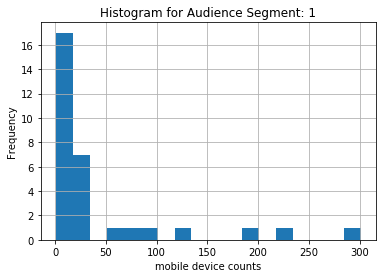

In [11]:
plt.hist(s, bins='auto')
key = 1
plt.title("Histogram for Audience Segment: " + str(int(key)))
plt.xlabel('mobile device counts')
plt.ylabel('Frequency')
plt.grid(True)

In [12]:
dict_audience = {}
dict_audience[1] = s

In [13]:
grouped_by_as_and_lH = location_audience_data.groupby(['audienceSegmentId','locationHash'])['count'].sum().unstack()
print(type(grouped_by_as_and_lH))
grouped_by_as_and_lH

<class 'pandas.core.frame.DataFrame'>


locationHash,0c89d6c44290bc885650a2eb4a3f480e,13151ff83caabeeecf14ee69512f70d3,19948cf2ef652334cc2d7f4609eb1f28,2a3180b90180b227db81c95b49240bd2,2ecabc7a18e9332b10bad28e75167544,387cc3a3376bedf0388698a3715ee137,3fa83a49e380c72cd6be15b29ac6e53d,4189a97e0a61cab5a19862910f6a555e,56795ff9c9d5378b4ead68c31833a406,56b704d2f77094c89a85d170b972b449,...,c3daa24315511ad4bbbce3d3be687908,c8c505947fa572674fe920e201da1e3f,c976d31ec7c1077481faa28693517ebc,cbd209a58f1613278732ae88afa25c79,ce68239ed83c6c1d85707fe8319a8917,e139955e52f449d931cacbc773950d95,e46630e498e76d2e04f2ed521f4ae35e,f4a2fe3a4cc1389495d39501f88f1153,f9fe2a60466142fc3666e5e20e4ca701,fecaa6e724c8d218682f00e49328a173
audienceSegmentId,,,,,,,,,,,,,,,,,,,,,
1,NaN,7.0,8.0,4.0,21.0,81.0,NaN,225.0,24.0,7.0,...,1.0,20.0,301.0,NaN,3.0,1.0,29.0,1.0,4.0,15.0
2,NaN,7.0,14.0,2.0,48.0,49.0,NaN,235.0,83.0,21.0,...,1.0,31.0,136.0,NaN,1.0,1.0,23.0,9.0,1.0,5.0
3,NaN,11.0,34.0,1.0,44.0,63.0,1.0,473.0,47.0,86.0,...,4.0,35.0,361.0,NaN,5.0,NaN,117.0,6.0,8.0,29.0
4,NaN,17.0,28.0,5.0,25.0,48.0,NaN,430.0,27.0,22.0,...,4.0,31.0,181.0,NaN,4.0,1.0,135.0,10.0,9.0,14.0
5,NaN,17.0,32.0,5.0,25.0,48.0,NaN,418.0,27.0,24.0,...,4.0,31.0,204.0,NaN,4.0,1.0,133.0,10.0,7.0,14.0
6,NaN,45.0,32.0,9.0,70.0,102.0,2.0,444.0,50.0,61.0,...,2.0,59.0,255.0,NaN,6.0,4.0,120.0,14.0,6.0,9.0
7,NaN,8.0,9.0,4.0,21.0,95.0,1.0,225.0,22.0,18.0,...,1.0,6.0,292.0,NaN,3.0,1.0,32.0,2.0,4.0,19.0
8,NaN,17.0,28.0,5.0,25.0,47.0,NaN,428.0,27.0,22.0,...,4.0,31.0,178.0,NaN,4.0,1.0,135.0,10.0,9.0,12.0
9,NaN,NaN,18.0,NaN,54.0,8.0,NaN,84.0,9.0,5.0,...,1.0,19.0,117.0,NaN,NaN,NaN,11.0,3.0,NaN,1.0


In [14]:
x = grouped_by_as_and_lH.loc[1]
x

locationHash
0c89d6c44290bc885650a2eb4a3f480e      NaN
13151ff83caabeeecf14ee69512f70d3      7.0
19948cf2ef652334cc2d7f4609eb1f28      8.0
2a3180b90180b227db81c95b49240bd2      4.0
2ecabc7a18e9332b10bad28e75167544     21.0
387cc3a3376bedf0388698a3715ee137     81.0
3fa83a49e380c72cd6be15b29ac6e53d      NaN
4189a97e0a61cab5a19862910f6a555e    225.0
56795ff9c9d5378b4ead68c31833a406     24.0
56b704d2f77094c89a85d170b972b449      7.0
5a1308e5465bfe32d67b8171ec5a1a58     34.0
5ae370d6b68926236ba7b659dbbbf251     27.0
5de857121848bc3caa0adfed05dbe3ae      7.0
60334adaae82a1a172c3c1020dee7b07     22.0
8237da911b3dc385276efc93b19ecaad      2.0
84f6050da3b919f5f742e8d5d787a264    193.0
88cd97c420635430a6014b672d5c67b6      3.0
892ed24d6fe6b03e61e6dd441d650fac      NaN
8e068a53d42717b05eb8ae317590165f    126.0
93afb61aab2c5b09107ebc0a8c1f6fac     11.0
95d58fb689c6dbc1a71d44dcaf43aa46     10.0
9a74a7e8192188f478b3bd3b1f887a03      4.0
b03a84f7ee3b2c4546e774cd36e762db     60.0
b14273d2a9fb0465d2fe6

In [15]:
type(x)

pandas.core.series.Series

In [16]:
x = x.dropna()

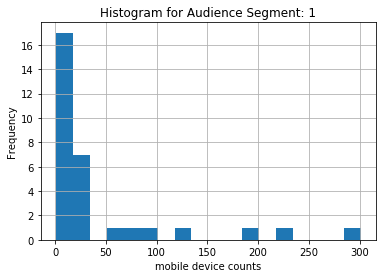

In [17]:
plt.hist(x, bins='auto')
key = 1
plt.title("Histogram for Audience Segment: " + str(int(key)))
plt.xlabel('mobile device counts')
plt.ylabel('Frequency')
plt.grid(True)

In [18]:
num_rows = len(grouped_by_as_and_lH)
num_rows

825

In [19]:
x2 = grouped_by_as_and_lH.loc[832]
x2

locationHash
0c89d6c44290bc885650a2eb4a3f480e       NaN
13151ff83caabeeecf14ee69512f70d3     122.0
19948cf2ef652334cc2d7f4609eb1f28       2.0
2a3180b90180b227db81c95b49240bd2       NaN
2ecabc7a18e9332b10bad28e75167544       NaN
387cc3a3376bedf0388698a3715ee137       7.0
3fa83a49e380c72cd6be15b29ac6e53d       NaN
4189a97e0a61cab5a19862910f6a555e      43.0
56795ff9c9d5378b4ead68c31833a406       6.0
56b704d2f77094c89a85d170b972b449      11.0
5a1308e5465bfe32d67b8171ec5a1a58       NaN
5ae370d6b68926236ba7b659dbbbf251       NaN
5de857121848bc3caa0adfed05dbe3ae       NaN
60334adaae82a1a172c3c1020dee7b07      33.0
8237da911b3dc385276efc93b19ecaad       NaN
84f6050da3b919f5f742e8d5d787a264      12.0
88cd97c420635430a6014b672d5c67b6       1.0
892ed24d6fe6b03e61e6dd441d650fac       NaN
8e068a53d42717b05eb8ae317590165f    3745.0
93afb61aab2c5b09107ebc0a8c1f6fac       1.0
95d58fb689c6dbc1a71d44dcaf43aa46       NaN
9a74a7e8192188f478b3bd3b1f887a03       NaN
b03a84f7ee3b2c4546e774cd36e762db      27.

In [20]:
# for index, row in grouped_by_as_and_lH.iterrows():
#     print(type(index))
#     print(index)
#     print('~~~~~~')

#     print(type(row))
#     print(row)
#     row = row.dropna()
#     print(row.describe())
#     print('------')
#     print('--------------------------------------')

<class 'int'>
1
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e      NaN
13151ff83caabeeecf14ee69512f70d3      7.0
19948cf2ef652334cc2d7f4609eb1f28      8.0
2a3180b90180b227db81c95b49240bd2      4.0
2ecabc7a18e9332b10bad28e75167544     21.0
387cc3a3376bedf0388698a3715ee137     81.0
3fa83a49e380c72cd6be15b29ac6e53d      NaN
4189a97e0a61cab5a19862910f6a555e    225.0
56795ff9c9d5378b4ead68c31833a406     24.0
56b704d2f77094c89a85d170b972b449      7.0
5a1308e5465bfe32d67b8171ec5a1a58     34.0
5ae370d6b68926236ba7b659dbbbf251     27.0
5de857121848bc3caa0adfed05dbe3ae      7.0
60334adaae82a1a172c3c1020dee7b07     22.0
8237da911b3dc385276efc93b19ecaad      2.0
84f6050da3b919f5f742e8d5d787a264    193.0
88cd97c420635430a6014b672d5c67b6      3.0
892ed24d6fe6b03e61e6dd441d650fac      NaN
8e068a53d42717b05eb8ae317590165f    126.0
93afb61aab2c5b09107ebc0a8c1f6fac     11.0
95d58fb689c6dbc1a71d44dcaf43aa46     10.0
9a74a7e8192188f478b3bd3b1f887a03      4.0
b03a

count     34.000000
mean      63.676471
std      130.986634
min        1.000000
25%        3.000000
50%       15.000000
75%       40.750000
max      524.000000
Name: 36, dtype: float64
------
--------------------------------------
<class 'int'>
37
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e     NaN
13151ff83caabeeecf14ee69512f70d3     1.0
19948cf2ef652334cc2d7f4609eb1f28     6.0
2a3180b90180b227db81c95b49240bd2     3.0
2ecabc7a18e9332b10bad28e75167544     NaN
387cc3a3376bedf0388698a3715ee137     1.0
3fa83a49e380c72cd6be15b29ac6e53d     NaN
4189a97e0a61cab5a19862910f6a555e    42.0
56795ff9c9d5378b4ead68c31833a406     1.0
56b704d2f77094c89a85d170b972b449     NaN
5a1308e5465bfe32d67b8171ec5a1a58     1.0
5ae370d6b68926236ba7b659dbbbf251     NaN
5de857121848bc3caa0adfed05dbe3ae     NaN
60334adaae82a1a172c3c1020dee7b07     4.0
8237da911b3dc385276efc93b19ecaad     8.0
84f6050da3b919f5f742e8d5d787a264     3.0
88cd97c420635430a6014b672d5c67b6     2.0

count       35.000000
mean      2337.142857
std       4798.569696
min         24.000000
25%        196.500000
50%        597.000000
75%       1340.500000
max      25875.000000
Name: 69, dtype: float64
------
--------------------------------------
<class 'int'>
70
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e       NaN
13151ff83caabeeecf14ee69512f70d3     207.0
19948cf2ef652334cc2d7f4609eb1f28     202.0
2a3180b90180b227db81c95b49240bd2      92.0
2ecabc7a18e9332b10bad28e75167544     184.0
387cc3a3376bedf0388698a3715ee137    1191.0
3fa83a49e380c72cd6be15b29ac6e53d       6.0
4189a97e0a61cab5a19862910f6a555e    6628.0
56795ff9c9d5378b4ead68c31833a406     402.0
56b704d2f77094c89a85d170b972b449     353.0
5a1308e5465bfe32d67b8171ec5a1a58     184.0
5ae370d6b68926236ba7b659dbbbf251     130.0
5de857121848bc3caa0adfed05dbe3ae     117.0
60334adaae82a1a172c3c1020dee7b07     368.0
8237da911b3dc385276efc93b19ecaad     102.0
84f6050da3b919f5f742e8d5d787a264   

count    7.000000
mean     2.142857
std      1.069045
min      1.000000
25%      1.500000
50%      2.000000
75%      2.500000
max      4.000000
Name: 115, dtype: float64
------
--------------------------------------
<class 'int'>
116
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e    NaN
13151ff83caabeeecf14ee69512f70d3    NaN
19948cf2ef652334cc2d7f4609eb1f28    NaN
2a3180b90180b227db81c95b49240bd2    NaN
2ecabc7a18e9332b10bad28e75167544    NaN
387cc3a3376bedf0388698a3715ee137    1.0
3fa83a49e380c72cd6be15b29ac6e53d    NaN
4189a97e0a61cab5a19862910f6a555e    1.0
56795ff9c9d5378b4ead68c31833a406    NaN
56b704d2f77094c89a85d170b972b449    1.0
5a1308e5465bfe32d67b8171ec5a1a58    NaN
5ae370d6b68926236ba7b659dbbbf251    NaN
5de857121848bc3caa0adfed05dbe3ae    NaN
60334adaae82a1a172c3c1020dee7b07    NaN
8237da911b3dc385276efc93b19ecaad    NaN
84f6050da3b919f5f742e8d5d787a264    NaN
88cd97c420635430a6014b672d5c67b6    NaN
892ed24d6fe6b03e61e6dd441d650f

count     27.000000
mean      45.851852
std      155.341238
min        1.000000
25%        2.000000
50%       10.000000
75%       17.500000
max      814.000000
Name: 187, dtype: float64
------
--------------------------------------
<class 'int'>
188
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e       NaN
13151ff83caabeeecf14ee69512f70d3     302.0
19948cf2ef652334cc2d7f4609eb1f28     369.0
2a3180b90180b227db81c95b49240bd2      37.0
2ecabc7a18e9332b10bad28e75167544     102.0
387cc3a3376bedf0388698a3715ee137      70.0
3fa83a49e380c72cd6be15b29ac6e53d       2.0
4189a97e0a61cab5a19862910f6a555e    4028.0
56795ff9c9d5378b4ead68c31833a406     658.0
56b704d2f77094c89a85d170b972b449     436.0
5a1308e5465bfe32d67b8171ec5a1a58      95.0
5ae370d6b68926236ba7b659dbbbf251      35.0
5de857121848bc3caa0adfed05dbe3ae       8.0
60334adaae82a1a172c3c1020dee7b07     549.0
8237da911b3dc385276efc93b19ecaad     186.0
84f6050da3b919f5f742e8d5d787a264    1087.0
88cd97

count     18.000000
mean      55.111111
std      121.370066
min        1.000000
25%        2.250000
50%        6.500000
75%       20.000000
max      383.000000
Name: 253, dtype: float64
------
--------------------------------------
<class 'int'>
254
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e       NaN
13151ff83caabeeecf14ee69512f70d3       1.0
19948cf2ef652334cc2d7f4609eb1f28       1.0
2a3180b90180b227db81c95b49240bd2      18.0
2ecabc7a18e9332b10bad28e75167544     141.0
387cc3a3376bedf0388698a3715ee137     225.0
3fa83a49e380c72cd6be15b29ac6e53d       NaN
4189a97e0a61cab5a19862910f6a555e      77.0
56795ff9c9d5378b4ead68c31833a406      12.0
56b704d2f77094c89a85d170b972b449       2.0
5a1308e5465bfe32d67b8171ec5a1a58       4.0
5ae370d6b68926236ba7b659dbbbf251      49.0
5de857121848bc3caa0adfed05dbe3ae       2.0
60334adaae82a1a172c3c1020dee7b07       4.0
8237da911b3dc385276efc93b19ecaad       NaN
84f6050da3b919f5f742e8d5d787a264      21.0
88cd97

count     25.000000
mean      47.560000
std      108.244353
min        1.000000
25%        2.000000
50%        6.000000
75%       15.000000
max      497.000000
Name: 315, dtype: float64
------
--------------------------------------
<class 'int'>
316
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e       NaN
13151ff83caabeeecf14ee69512f70d3       2.0
19948cf2ef652334cc2d7f4609eb1f28       2.0
2a3180b90180b227db81c95b49240bd2      95.0
2ecabc7a18e9332b10bad28e75167544       NaN
387cc3a3376bedf0388698a3715ee137     349.0
3fa83a49e380c72cd6be15b29ac6e53d       NaN
4189a97e0a61cab5a19862910f6a555e      19.0
56795ff9c9d5378b4ead68c31833a406       2.0
56b704d2f77094c89a85d170b972b449       2.0
5a1308e5465bfe32d67b8171ec5a1a58       1.0
5ae370d6b68926236ba7b659dbbbf251       2.0
5de857121848bc3caa0adfed05dbe3ae       1.0
60334adaae82a1a172c3c1020dee7b07       9.0
8237da911b3dc385276efc93b19ecaad       NaN
84f6050da3b919f5f742e8d5d787a264       8.0
88cd97

count     22.000000
mean      38.636364
std      103.017588
min        1.000000
25%        2.000000
50%        3.000000
75%       17.500000
max      451.000000
Name: 378, dtype: float64
------
--------------------------------------
<class 'int'>
379
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e       NaN
13151ff83caabeeecf14ee69512f70d3      76.0
19948cf2ef652334cc2d7f4609eb1f28       7.0
2a3180b90180b227db81c95b49240bd2      23.0
2ecabc7a18e9332b10bad28e75167544      33.0
387cc3a3376bedf0388698a3715ee137     169.0
3fa83a49e380c72cd6be15b29ac6e53d       NaN
4189a97e0a61cab5a19862910f6a555e     558.0
56795ff9c9d5378b4ead68c31833a406      41.0
56b704d2f77094c89a85d170b972b449     115.0
5a1308e5465bfe32d67b8171ec5a1a58      61.0
5ae370d6b68926236ba7b659dbbbf251      15.0
5de857121848bc3caa0adfed05dbe3ae      97.0
60334adaae82a1a172c3c1020dee7b07      24.0
8237da911b3dc385276efc93b19ecaad      56.0
84f6050da3b919f5f742e8d5d787a264     239.0
88cd97

count     5.000000
mean     15.400000
std      27.373345
min       1.000000
25%       1.000000
50%       2.000000
75%       9.000000
max      64.000000
Name: 445, dtype: float64
------
--------------------------------------
<class 'int'>
446
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e       NaN
13151ff83caabeeecf14ee69512f70d3      62.0
19948cf2ef652334cc2d7f4609eb1f28      25.0
2a3180b90180b227db81c95b49240bd2       3.0
2ecabc7a18e9332b10bad28e75167544      11.0
387cc3a3376bedf0388698a3715ee137      53.0
3fa83a49e380c72cd6be15b29ac6e53d       4.0
4189a97e0a61cab5a19862910f6a555e     757.0
56795ff9c9d5378b4ead68c31833a406      65.0
56b704d2f77094c89a85d170b972b449      62.0
5a1308e5465bfe32d67b8171ec5a1a58      53.0
5ae370d6b68926236ba7b659dbbbf251      19.0
5de857121848bc3caa0adfed05dbe3ae      37.0
60334adaae82a1a172c3c1020dee7b07     231.0
8237da911b3dc385276efc93b19ecaad     116.0
84f6050da3b919f5f742e8d5d787a264     270.0
88cd97c4206354

Name: 507, dtype: float64
------
--------------------------------------
<class 'int'>
508
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e      NaN
13151ff83caabeeecf14ee69512f70d3      1.0
19948cf2ef652334cc2d7f4609eb1f28      NaN
2a3180b90180b227db81c95b49240bd2      1.0
2ecabc7a18e9332b10bad28e75167544      1.0
387cc3a3376bedf0388698a3715ee137      4.0
3fa83a49e380c72cd6be15b29ac6e53d      NaN
4189a97e0a61cab5a19862910f6a555e     12.0
56795ff9c9d5378b4ead68c31833a406      2.0
56b704d2f77094c89a85d170b972b449      1.0
5a1308e5465bfe32d67b8171ec5a1a58      1.0
5ae370d6b68926236ba7b659dbbbf251      1.0
5de857121848bc3caa0adfed05dbe3ae      1.0
60334adaae82a1a172c3c1020dee7b07      5.0
8237da911b3dc385276efc93b19ecaad      NaN
84f6050da3b919f5f742e8d5d787a264      1.0
88cd97c420635430a6014b672d5c67b6      1.0
892ed24d6fe6b03e61e6dd441d650fac      NaN
8e068a53d42717b05eb8ae317590165f     46.0
93afb61aab2c5b09107ebc0a8c1f6fac      NaN
95d58fb689c6db

Name: 571, dtype: float64
------
--------------------------------------
<class 'int'>
572
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e       NaN
13151ff83caabeeecf14ee69512f70d3     283.0
19948cf2ef652334cc2d7f4609eb1f28     290.0
2a3180b90180b227db81c95b49240bd2     168.0
2ecabc7a18e9332b10bad28e75167544     183.0
387cc3a3376bedf0388698a3715ee137    1118.0
3fa83a49e380c72cd6be15b29ac6e53d       1.0
4189a97e0a61cab5a19862910f6a555e    3947.0
56795ff9c9d5378b4ead68c31833a406     924.0
56b704d2f77094c89a85d170b972b449     435.0
5a1308e5465bfe32d67b8171ec5a1a58     398.0
5ae370d6b68926236ba7b659dbbbf251     274.0
5de857121848bc3caa0adfed05dbe3ae     148.0
60334adaae82a1a172c3c1020dee7b07     378.0
8237da911b3dc385276efc93b19ecaad     132.0
84f6050da3b919f5f742e8d5d787a264     963.0
88cd97c420635430a6014b672d5c67b6     272.0
892ed24d6fe6b03e61e6dd441d650fac      22.0
8e068a53d42717b05eb8ae317590165f    2822.0
93afb61aab2c5b09107ebc0a8c1f6fac     

count    11.000000
mean      9.727273
std      12.498727
min       1.000000
25%       2.000000
50%       5.000000
75%      13.500000
max      44.000000
Name: 624, dtype: float64
------
--------------------------------------
<class 'int'>
625
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e    NaN
13151ff83caabeeecf14ee69512f70d3    NaN
19948cf2ef652334cc2d7f4609eb1f28    NaN
2a3180b90180b227db81c95b49240bd2    NaN
2ecabc7a18e9332b10bad28e75167544    NaN
387cc3a3376bedf0388698a3715ee137    2.0
3fa83a49e380c72cd6be15b29ac6e53d    NaN
4189a97e0a61cab5a19862910f6a555e    3.0
56795ff9c9d5378b4ead68c31833a406    NaN
56b704d2f77094c89a85d170b972b449    NaN
5a1308e5465bfe32d67b8171ec5a1a58    NaN
5ae370d6b68926236ba7b659dbbbf251    NaN
5de857121848bc3caa0adfed05dbe3ae    NaN
60334adaae82a1a172c3c1020dee7b07    NaN
8237da911b3dc385276efc93b19ecaad    NaN
84f6050da3b919f5f742e8d5d787a264    NaN
88cd97c420635430a6014b672d5c67b6    NaN
892ed24d6fe6b03e61e6dd

--------------------------------------
<class 'int'>
679
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e     NaN
13151ff83caabeeecf14ee69512f70d3     2.0
19948cf2ef652334cc2d7f4609eb1f28     2.0
2a3180b90180b227db81c95b49240bd2     NaN
2ecabc7a18e9332b10bad28e75167544     NaN
387cc3a3376bedf0388698a3715ee137     9.0
3fa83a49e380c72cd6be15b29ac6e53d     NaN
4189a97e0a61cab5a19862910f6a555e    33.0
56795ff9c9d5378b4ead68c31833a406     5.0
56b704d2f77094c89a85d170b972b449     6.0
5a1308e5465bfe32d67b8171ec5a1a58     NaN
5ae370d6b68926236ba7b659dbbbf251     1.0
5de857121848bc3caa0adfed05dbe3ae     1.0
60334adaae82a1a172c3c1020dee7b07     5.0
8237da911b3dc385276efc93b19ecaad     1.0
84f6050da3b919f5f742e8d5d787a264     3.0
88cd97c420635430a6014b672d5c67b6     NaN
892ed24d6fe6b03e61e6dd441d650fac     NaN
8e068a53d42717b05eb8ae317590165f     9.0
93afb61aab2c5b09107ebc0a8c1f6fac     NaN
95d58fb689c6dbc1a71d44dcaf43aa46     NaN
9a74a7e8192188f478b3bd3b1f

count    21.000000
mean      8.857143
std      11.917574
min       1.000000
25%       1.000000
50%       2.000000
75%      14.000000
max      39.000000
Name: 726, dtype: float64
------
--------------------------------------
<class 'int'>
727
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e      NaN
13151ff83caabeeecf14ee69512f70d3     21.0
19948cf2ef652334cc2d7f4609eb1f28      7.0
2a3180b90180b227db81c95b49240bd2      3.0
2ecabc7a18e9332b10bad28e75167544      5.0
387cc3a3376bedf0388698a3715ee137     28.0
3fa83a49e380c72cd6be15b29ac6e53d      NaN
4189a97e0a61cab5a19862910f6a555e    259.0
56795ff9c9d5378b4ead68c31833a406     10.0
56b704d2f77094c89a85d170b972b449     27.0
5a1308e5465bfe32d67b8171ec5a1a58      4.0
5ae370d6b68926236ba7b659dbbbf251      3.0
5de857121848bc3caa0adfed05dbe3ae      2.0
60334adaae82a1a172c3c1020dee7b07     28.0
8237da911b3dc385276efc93b19ecaad      2.0
84f6050da3b919f5f742e8d5d787a264     76.0
88cd97c420635430a6014b672d5c67

count      31.000000
mean      118.322581
std       266.870054
min         1.000000
25%         4.500000
50%        17.000000
75%        58.000000
max      1234.000000
Name: 783, dtype: float64
------
--------------------------------------
<class 'int'>
784
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e       NaN
13151ff83caabeeecf14ee69512f70d3      25.0
19948cf2ef652334cc2d7f4609eb1f28     271.0
2a3180b90180b227db81c95b49240bd2      14.0
2ecabc7a18e9332b10bad28e75167544       6.0
387cc3a3376bedf0388698a3715ee137     351.0
3fa83a49e380c72cd6be15b29ac6e53d       1.0
4189a97e0a61cab5a19862910f6a555e    2270.0
56795ff9c9d5378b4ead68c31833a406     143.0
56b704d2f77094c89a85d170b972b449      48.0
5a1308e5465bfe32d67b8171ec5a1a58      11.0
5ae370d6b68926236ba7b659dbbbf251       6.0
5de857121848bc3caa0adfed05dbe3ae      10.0
60334adaae82a1a172c3c1020dee7b07     488.0
8237da911b3dc385276efc93b19ecaad      56.0
84f6050da3b919f5f742e8d5d787a264     989.

Name: 831, dtype: float64
------
--------------------------------------
<class 'int'>
832
~~~~~~
<class 'pandas.core.series.Series'>
locationHash
0c89d6c44290bc885650a2eb4a3f480e       NaN
13151ff83caabeeecf14ee69512f70d3     122.0
19948cf2ef652334cc2d7f4609eb1f28       2.0
2a3180b90180b227db81c95b49240bd2       NaN
2ecabc7a18e9332b10bad28e75167544       NaN
387cc3a3376bedf0388698a3715ee137       7.0
3fa83a49e380c72cd6be15b29ac6e53d       NaN
4189a97e0a61cab5a19862910f6a555e      43.0
56795ff9c9d5378b4ead68c31833a406       6.0
56b704d2f77094c89a85d170b972b449      11.0
5a1308e5465bfe32d67b8171ec5a1a58       NaN
5ae370d6b68926236ba7b659dbbbf251       NaN
5de857121848bc3caa0adfed05dbe3ae       NaN
60334adaae82a1a172c3c1020dee7b07      33.0
8237da911b3dc385276efc93b19ecaad       NaN
84f6050da3b919f5f742e8d5d787a264      12.0
88cd97c420635430a6014b672d5c67b6       1.0
892ed24d6fe6b03e61e6dd441d650fac       NaN
8e068a53d42717b05eb8ae317590165f    3745.0
93afb61aab2c5b09107ebc0a8c1f6fac     

In [21]:
f = open("output_kei/audience_segment/output.txt", "w+")
for index, row in grouped_by_as_and_lH.iterrows():
    print(index, file=f)
    row = row.dropna()
    print(row.describe(), file=f)
    print("-----------------------------------", file=f)
#     removed_outlier = remove_outlier(value, 'count')
    plt.title("Histogram for Audience Segment: " + str(int(index)))
    plt.hist(row, bins='auto')
    plt.xlabel('mobile device counts')
    plt.ylabel('Frequency');
    plt.grid(True)
    plt.savefig("output_kei/audience_segment/histogram/audience_segment_" + str(int(index)) + ".png", bbox_inches='tight',dpi=100)
    plt.close()


f.close()
print('done.')

done.
